In [1]:
import numpy as np 
import pandas as pd
#from tweepy.streaming import StreamListner
from tweepy import OAuthHandler
from tweepy import Stream
from textblob import TextBlob
#import TextBlob
import tweepy
import re
from wordcloud import WordCloud, STOPWORDS

In [2]:
consumer_key="pxVtnqmxyRlORbO61He73OcjD"
consumer_secret="1uPdOXUtvRTN0ZmodbbUgYyOjs8U8IkGDOd3BMDtjXp4W566mD"
access_token="167750290-1P8C3JDRvoRS1eLa0b2zPRhnwJ9bDY4hOsz8Qb6H"
access_secret="OmFH0bmb1okjF5puI9IxcvxX0DWI4JUrBmNDJqMNR7T7O"

auth= OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

In [3]:
api = tweepy.API(auth)

fetched_tweets = api.search(q = 'MAchine Learning' , count = 400 , ln='en')

In [4]:
fetched_tweets


[Status(_api=<tweepy.api.API object at 0x000000C648F0BE80>, _json={'created_at': 'Wed Aug 28 09:23:30 +0000 2019', 'id': 1166642453438484480, 'id_str': '1166642453438484480', 'text': "@kleinuwu If you're okay with ignoring all the data protection issues and your appearance landing in machine learni… https://t.co/5su0JlutlJ", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'kleinuwu', 'name': 'süssmaus', 'id': 711452254, 'id_str': '711452254', 'indices': [0, 9]}], 'urls': [{'url': 'https://t.co/5su0JlutlJ', 'expanded_url': 'https://twitter.com/i/web/status/1166642453438484480', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': 1166635034561908736, 'in_reply_to_status_id_str': '1166635034561908736', 'in_reply_to_user_id': 711452254,

In [5]:
tweet_df=pd.DataFrame(columns=["text"])

In [6]:
tweet_df


,text


In [7]:
tweets = []
#parsing tweet one by one
for tweet in fetched_tweets:
    tweets_text = tweet.text
    #appending parsed tweet to tweet list
    tweets.append(tweets_text)
    
tweet_df["text"]=tweets
tweet_df.iloc[12,0]

'RT @KirkDBorne: Bayesian #MachineLearning —\nPart 1: https://t.co/ADIREGWQ7q\nPart 2: https://t.co/jH143FeHN8\nPart 3: https://t.co/OETWxzpPiM…'

In [8]:
tweet_df["text"]=pd.DataFrame(tweet_df["text"].unique())

In [9]:
tweet_df1=tweet_df.dropna()

In [10]:
tweet_df1.isnull().sum()

text    0
dtype: int64

In [11]:
tweet_df1.head()

,text
0,@kleinuwu If you're okay with ignoring all the...
1,Google's new approach to machine learning with...
2,Is #MachineLearning engineer career your dream...
3,RT @DATAFYiNG: What Machine Learning Teaches U...
4,【大阪開催】MACHINE LEARNING Meetup KANSAI #6 @ 〒530...


In [12]:
stopwords = set(STOPWORDS)

In [13]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [14]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in tweet_df1['text']])


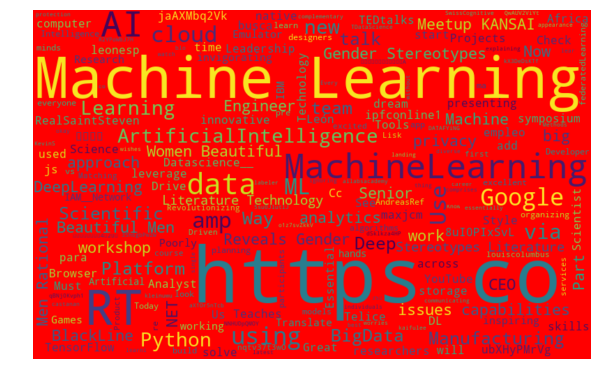

In [15]:
wordcloud = WordCloud(width = 800,height=500,random_state=21,background_color="red", max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [16]:
df_sent = tweet_df1

In [17]:
count = 0 
df = tweet_df1["text"].astype(str)
for i in df:
    #print analysis sentiment .polarity
    analysis = TextBlob(df[count])
    df_sent.loc[count,"Sentiment"]=analysis.sentiment.polarity
    count=count+1

C:\Users\RAM1\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\RAM1\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [18]:
df_sent

,text,Sentiment
0,@kleinuwu If you're okay with ignoring all the...,0.500000
1,Google's new approach to machine learning with...,0.136364
2,Is #MachineLearning engineer career your dream...,0.500000
3,RT @DATAFYiNG: What Machine Learning Teaches U...,0.000000
4,【大阪開催】MACHINE LEARNING Meetup KANSAI #6 @ 〒530...,0.000000
5,RT @SwissCognitive: Here are 7 of the best #AI...,1.000000
6,RT @ailabsacademy: Machine Learning is essenti...,0.068182
7,Machine Learning in the Browser using TensorFl...,0.000000
8,Data teams are diverse. A single team comprise...,-0.071429
9,RT @ipfconline1: 10 #MachineLearning Methods t...,0.000000


In [19]:
df_sent.iloc[12,0]

'RT @KirkDBorne: Bayesian #MachineLearning —\nPart 1: https://t.co/ADIREGWQ7q\nPart 2: https://t.co/jH143FeHN8\nPart 3: https://t.co/OETWxzpPiM…'

In [20]:
np.mean(df_sent["Sentiment"])

0.13344983447924622